In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from math import sqrt

In [21]:
raw_data = pd.read_csv('./public/train.csv')

In [22]:
raw_data

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,159251,40,155,45,69.0,1.5,2.0,1,1,127,...,72,159,14.5,1,0.8,25,26,13,0,0
159252,159252,50,155,75,82.0,1.0,1.0,1,1,120,...,64,108,14.5,1,0.6,21,20,18,0,0
159253,159253,40,160,50,66.0,1.5,1.0,1,1,114,...,87,93,10.9,1,0.6,15,9,12,0,0
159254,159254,50,165,75,92.0,1.2,1.0,1,1,121,...,55,80,14.4,1,1.1,22,17,37,0,1


In [24]:
raw_data.columns

Index(['id', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

In [25]:
raw_data = raw_data.drop(columns=['id', 'age'])

In [26]:
raw_data

,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,165,60,81.0,0.5,0.6,1,1,135,87,94,...,40,75,16.5,1,1.0,22,25,27,0,1
1,165,65,89.0,0.6,0.7,2,2,146,83,147,...,57,126,16.2,1,1.1,27,23,37,1,0
2,170,75,81.0,0.4,0.5,1,1,118,75,79,...,45,93,17.4,1,0.8,27,31,53,0,1
3,180,95,105.0,1.5,1.2,1,1,131,88,91,...,38,102,15.9,1,1.0,20,27,30,1,0
4,165,60,80.5,1.5,1.0,1,1,121,76,91,...,44,93,15.4,1,0.8,19,13,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,155,45,69.0,1.5,2.0,1,1,127,80,64,...,72,159,14.5,1,0.8,25,26,13,0,0
159252,155,75,82.0,1.0,1.0,1,1,120,80,89,...,64,108,14.5,1,0.6,21,20,18,0,0
159253,160,50,66.0,1.5,1.0,1,1,114,70,84,...,87,93,10.9,1,0.6,15,9,12,0,0
159254,165,75,92.0,1.2,1.0,1,1,121,90,122,...,55,80,14.4,1,1.1,22,17,37,0,1


In [27]:
scaler = StandardScaler()
scaler.fit(raw_data.drop('smoking', axis=1))


StandardScaler()

In [28]:
scaled_features = scaler.transform(raw_data.drop('smoking', axis=1))
scaled_data = pd.DataFrame(scaled_features, columns = raw_data.drop('smoking', axis=1).columns)


In [29]:
scaled_data

,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,-0.030268,-0.567581,-0.223489,-1.257856,-1.022156,-0.156725,-0.154865,0.981702,1.125777,-0.283930,...,2.604429,-1.135246,-1.406581,1.189928,-0.213401,0.597927,-0.371570,-0.087326,-0.295342,-0.496866
1,-0.030268,-0.170319,0.669577,-1.009169,-0.767247,6.380587,6.457242,1.845852,0.681066,3.173413,...,-1.097105,0.082162,0.404573,0.980315,-0.213401,1.155511,0.156700,-0.199983,0.025124,2.012614
2,0.536694,0.624205,-0.223489,-1.506543,-1.277064,-0.156725,-0.154865,-0.353802,-0.208355,-1.262423,...,1.048274,-0.777185,-0.767350,1.818767,-0.213401,-0.517239,0.156700,0.250645,0.537870,-0.496866
3,1.670617,2.213252,2.455708,1.229017,0.507296,-0.156725,-0.154865,0.667465,1.236955,-0.479628,...,1.138923,-1.278470,-0.447734,0.770702,-0.213401,0.597927,-0.582878,0.025331,-0.199202,2.012614
4,-0.030268,-0.567581,-0.279305,1.229017,-0.002521,-0.156725,-0.154865,-0.118125,-0.097177,-0.479628,...,-0.613639,-0.848797,-0.767350,0.421347,-0.213401,-0.517239,-0.688532,-0.763267,-0.615808,-0.496866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,-1.164191,-1.759366,-1.563087,1.229017,2.546566,-0.156725,-0.154865,0.353229,0.347533,-2.240916,...,-1.217971,1.156345,1.576497,-0.207493,-0.213401,-0.517239,-0.054608,-0.030997,-0.743994,-0.496866
159252,-1.164191,0.624205,-0.111855,-0.014419,-0.002521,-0.156725,-0.154865,-0.196684,0.347533,-0.610094,...,1.123815,0.583447,-0.234657,-0.207493,-0.213401,-1.632406,-0.477224,-0.368968,-0.583761,-0.496866
159253,-0.597229,-1.362104,-1.897986,1.229017,-0.002521,-0.156725,-0.154865,-0.668039,-0.764243,-0.936258,...,-1.248188,2.230528,-0.767350,-2.722849,-0.213401,-1.632406,-1.111148,-0.988581,-0.776041,-0.496866
159254,-0.030268,0.624205,1.004477,0.482955,-0.002521,-0.156725,-0.154865,-0.118125,1.459310,1.542591,...,0.307967,-0.061063,-1.229016,-0.277364,-0.213401,1.155511,-0.371570,-0.537954,0.025124,-0.496866


In [30]:
x = scaled_data
y = raw_data['smoking']

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3)

model = KNeighborsClassifier(n_neighbors = 55)
model.fit(x_training_data, y_training_data)


KNeighborsClassifier(n_neighbors=55)

In [31]:
train_preds = model.predict(x_training_data)
test_preds = model.predict(x_test_data)

In [32]:
mseTrain = mean_squared_error(y_training_data, train_preds)
rmseTrain = sqrt(mseTrain)
rmseTrain

0.48460544434840225

In [33]:
mseTest = mean_squared_error(y_test_data, test_preds)
rmseTest = sqrt(mseTest)
rmseTest

0.49513614786950966

In [ ]:
print(classification_report(y_test_data, ))

In [19]:
parameters = {
     "n_neighbors": range(55, 56),
     "weights": ["uniform", "distance"],
 }
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(x_training_data, y_training_data)


GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(55, 56),
                         'weights': ['uniform', 'distance']})

In [20]:
gridsearch.best_params_

{'n_neighbors': 55, 'weights': 'distance'}

In [43]:
train_preds_grid = gridsearch.predict(x_training_data)
train_mse = mean_squared_error(y_training_data, train_preds_grid)
train_rmse = sqrt(train_mse)
test_preds_grid = gridsearch.predict(x_test_data)
test_mse = mean_squared_error(y_test_data, test_preds_grid)
test_rmse = sqrt(test_mse)
train_rmse
test_rmse

0.22024805721727045

In [44]:
bagged_knn = KNeighborsRegressor(n_neighbors=55, weights="distance")

In [45]:
from sklearn.ensemble import BaggingRegressor
bagging_model = BaggingRegressor(bagged_knn, n_estimators=100)

In [47]:
print(classification_report(y_test_data, test_preds))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77     26862
           1       0.69      0.80      0.74     20915

    accuracy                           0.75     47777
   macro avg       0.76      0.76      0.75     47777
weighted avg       0.76      0.75      0.76     47777



In [ ]:
plt.scatter(raw_data[0][:,0], raw_data[0][:,1], c=raw_data[1]);

KeyError: 0

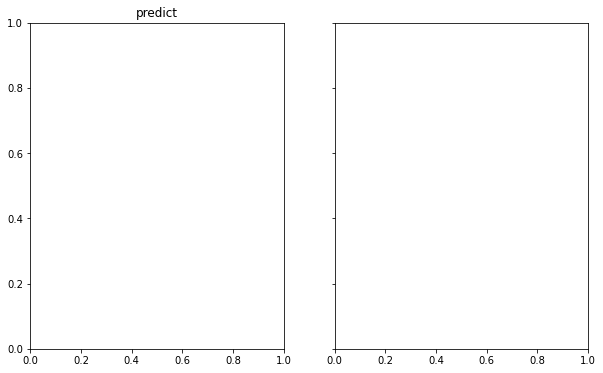

In [48]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('predict')
ax1.scatter(raw_data[0][:,0], raw_data[0][:,1],c=model.labels_)
ax2.set_title('Real.')
ax2.scatter(raw_data[0][:,0], raw_data[0][:,1],c=raw_data[1])